In [1]:
from pathlib import Path

import nltk
from collections import Counter
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
sns.set(color_codes=True)
FIGSIZE = (12, 6)

# Paths for files
ROOT_FOLDERPATH = Path.cwd().parent.parent
DATASET_FOLDERPATH = ROOT_FOLDERPATH / 'data' / 'raw'
NEG_DATASET_FILEPATH = DATASET_FOLDERPATH / 'rt-polarity.neg'
POS_DATASET_FILEPATH = DATASET_FOLDERPATH / 'rt-polarity.pos'

# Data labels
POS = 1
NEG = 0
LABEL_NAMES = {
    POS: "Positive",
    NEG: "Negative"
}

##### Overview the formatting

In [2]:
linecount = 3
with NEG_DATASET_FILEPATH.open() as dataset:
    head = [next(dataset) for x in range(linecount)]
print(*head, sep='\n')

simplistic , silly and tedious . 

it's so laddish and juvenile , only teenage boys could possibly find it funny . 

exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 



##### Load the dataset to memory

In [3]:
with NEG_DATASET_FILEPATH.open() as file:
    corpus_neg = file.readlines()
    
with POS_DATASET_FILEPATH.open() as file:
    corpus_pos = file.readlines()

##### Show dataset size

In [17]:
print(*[f"{label_name} label: {len(corpus)} snippets" 
       for label_name, corpus in 
       (("Positive", corpus_pos), 
        ("Negative", corpus_neg))], sep='\n')

Positive label: 5331 snippets
Negative label: 5331 snippets


##### Transform and clean data

In [5]:
nltk.download('stopwords', quiet=True, raise_on_error=True)
nltk_stop_words = list(set(nltk.corpus.stopwords.words('english')))
nltk.download('punkt', quiet=True, raise_on_error=True)
nltk_porter_stemmer = nltk.stem.PorterStemmer()

def line_to_preprocessed_tokens(line):
    tokens = nltk.word_tokenize(line)
    tokens = (token.lower() for token in tokens)  # Ensure lower-case characters
    # Remove words with non-alphabet characters
    tokens = (token for token in tokens if token.isalpha())
    tokens = (token for token in tokens if token not in nltk_stop_words)  # Remove stop words
    tokens = (nltk_porter_stemmer.stem(token) for token in tokens)  # Stemming
    return list(tokens)

# Show result
line_to_preprocessed_tokens('I think this movie is great !')

['think', 'movi', 'great']

In [6]:
def preprocess_corpus(corpus):
    corpus = (line_to_preprocessed_tokens(line) for line in corpus)
    return [tokens for tokens in corpus if tokens]  # Remove empty lists

tokens_dataset_neg, tokens_dataset_pos = preprocess_corpus(corpus_neg), preprocess_corpus(corpus_pos)

In [7]:
# Show result
print(*tokens_dataset_neg[0:3], sep='\n')

['simplist', 'silli', 'tediou']
['laddish', 'juvenil', 'teenag', 'boy', 'could', 'possibl', 'find', 'funni']
['exploit', 'larg', 'devoid', 'depth', 'sophist', 'would', 'make', 'watch', 'graphic', 'treatment', 'crime', 'bearabl']


##### Get token frequencies

In [8]:
def get_all_tokens_from_dataset(tokens_dataset):
    return [word for line in tokens_dataset for word in line]  # Flatten a 2D array

tokens_pos, tokens_neg = (get_all_tokens_from_dataset(tokens_dataset_pos), 
                          get_all_tokens_from_dataset(tokens_dataset_neg))
tokens = tokens_pos + tokens_neg
counter_pos, counter_neg, counter = Counter(tokens_pos), Counter(tokens_neg), Counter(tokens)

##### Show histogram of token frequencies

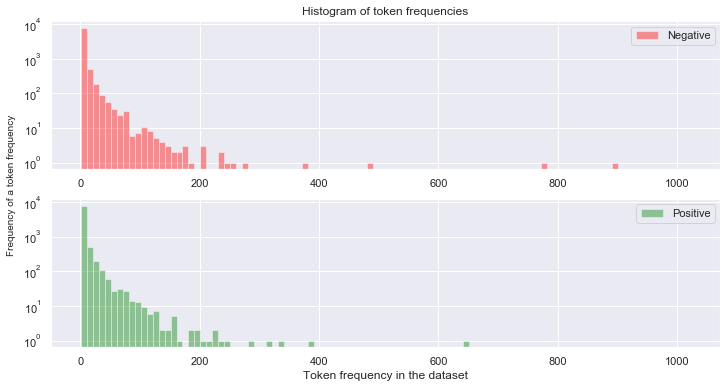

In [9]:
# Text
title = "Histogram of token frequencies"
xlabel = "Token frequency in the dataset"
ylabel = "Frequency of a token frequency"

# Values
max_bin_value = max(c.most_common(1)[0][1] for c in (counter_neg, counter_pos))
bin_size = 10
values_neg = [int(v) for v in counter_neg.values()]
values_pos = [int(v) for v in counter_pos.values()]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=FIGSIZE, sharey=True)
ax[0].set(yscale='log', xlabel='', ylabel='')
ax[1].set(yscale='log', xlabel=xlabel, ylabel='')
fig.text(0.08, 0.5, ylabel, ha="center", va="center", rotation=90)
bins = range(1, max_bin_value, bin_size)
sns.distplot(values_neg, bins=bins, kde=False, color="red",
             label=LABEL_NAMES[NEG], ax=ax[0]).set_title(title)
sns.distplot(values_pos, bins=bins, kde=False, color="green",
             label=LABEL_NAMES[POS], ax=ax[1])
for ax_ in ax:
    ax_.legend()

##### Show most frequent words

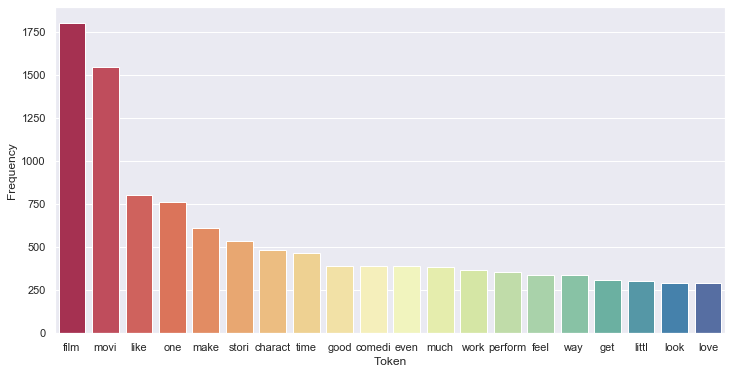

In [10]:
xlabel, ylabel = "Token", "Frequency"
df = pd.DataFrame(counter.most_common(20), columns = [xlabel, ylabel])
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.barplot(data=df, ax=ax, x=xlabel, y=ylabel, palette='Spectral')
pass